<a href="https://colab.research.google.com/github/SauravSJK/Face-Aging/blob/main/CSS_586_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Lib import and data download

In [ ]:
!pip3 install gdown
!gdown --fuzzy "https://drive.google.com/file/d/0BxYys69jI14kYVM3aVhKS1VhRUk/view?usp=share_link&resourcekey=0-dabpv_3J0C0cditpiAfhAw"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Downloading...
From: https://drive.google.com/uc?id=0BxYys69jI14kYVM3aVhKS1VhRUk
To: /content/UTKFace.tar.gz
100% 107M/107M [00:02<00:00, 48.1MB/s]


In [ ]:
import os, pandas as pd, matplotlib.pyplot as plt

In [ ]:
!python3 --V

unknown option --V
usage: python3 [option] ... [-c cmd | -m mod | file | -] [arg] ...
Try `python -h' for more information.


### Extract data and preprocess it to get a DataFrame

In [ ]:
!tar -xf UTKFace.tar.gz
!rm UTKFace.tar.gz

In [ ]:
folder_path = "UTKFace"
age = []
gender = []
race = []
img_path = []
for file in os.listdir(folder_path):
  name = file.split('_')
  # Some files do not have race in the name, so skip them (just 3 files)
  if len(name) != 4:
    continue
  age.append(int(name[0]))
  gender.append(int(name[1]))
  race.append(int(name[2]))
  img_path.append(file)
data = pd.DataFrame({'age' : age, 'gender': gender, 'race': race, 'img':img_path})

### Display data distributions

In [ ]:
data.describe()

,age,gender,race
count,23705.000000,23705.000000,23705.000000
mean,33.300907,0.477283,1.269226
std,19.885708,0.499494,1.345638
min,1.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000
50%,29.000000,0.000000,1.000000
75%,45.000000,1.000000,2.000000
max,116.000000,1.000000,4.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     23705 non-null  int64 
 1   gender  23705 non-null  int64 
 2   race    23705 non-null  int64 
 3   img     23705 non-null  object
dtypes: int64(3), object(1)
memory usage: 740.9+ KB


In [ ]:
import numpy as np
# create a list of our conditions
conditions = [
    (data['age'] <= 5),
    (data['age'] > 5) & (data['age'] <= 10),
    (data['age'] > 10) & (data['age'] <= 15),
    (data['age'] > 15) & (data['age'] <= 20),
    (data['age'] > 20) & (data['age'] <= 25),
    (data['age'] > 25) & (data['age'] <= 30),
    (data['age'] > 30) & (data['age'] <= 40),
    (data['age'] > 40) & (data['age'] <= 50),
    (data['age'] > 50) & (data['age'] <= 60),
    (data['age'] > 60) & (data['age'] <= 70),
    (data['age'] > 70) & (data['age'] <= 80),
    (data['age'] > 80) & (data['age'] <= 90),
    (data['age'] > 90) & (data['age'] <= 100),
    (data['age'] > 100)
    ]

# create a list of the values we want to assign for each condition
values = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '100+']

# create a new column and use np.select to assign values to it using our lists as arguments
data['age_group'] = np.select(conditions, values)

# display updated DataFrame
data.head()

,age,gender,race,img,age_group
0,53,0,3,53_0_3_20170119164025958.jpg.chip.jpg,51-60
1,9,1,4,9_1_4_20170103200637399.jpg.chip.jpg,6-10
2,35,1,2,35_1_2_20170116233432190.jpg.chip.jpg,31-40
3,65,0,3,65_0_3_20170117190407347.jpg.chip.jpg,61-70
4,43,0,0,43_0_0_20170117142951181.jpg.chip.jpg,41-50


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>],
       [<Axes: title={'center': 'race'}>, <Axes: >]], dtype=object)

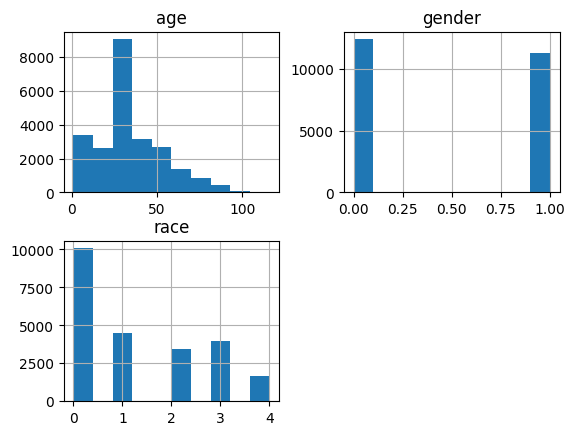

In [ ]:
data.hist()

In [ ]:
data['age_group'].value_counts()

26-30     5024
31-40     4338
21-25     2760
0-5       2363
51-60     2211
41-50     2100
61-70     1170
16-20     1049
6-10       855
71-80      685
11-15      610
81-90      453
91-100      66
100+        21
Name: age_group, dtype: int64

<Axes: >

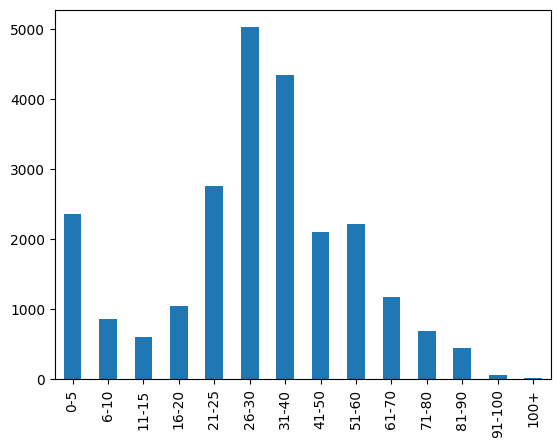

In [ ]:
data['age_group'].value_counts().loc[values].plot(kind = 'bar')

([<matplotlib.axis.XTick at 0x7fd38b229de0>,
 [Text(0.0, 0, '(0, 0)'),
  Text(1.0, 0, '(1, 0)'),
  Text(2.0, 0, '(0, 1)'),
  Text(3.0, 0, '(0, 3)'),
  Text(4.0, 0, '(1, 1)'),
  Text(5.0, 0, '(1, 2)'),
  Text(6.0, 0, '(1, 3)'),
  Text(7.0, 0, '(0, 2)'),
  Text(8.0, 0, '(1, 4)'),
  Text(9.0, 0, '(0, 4)')])

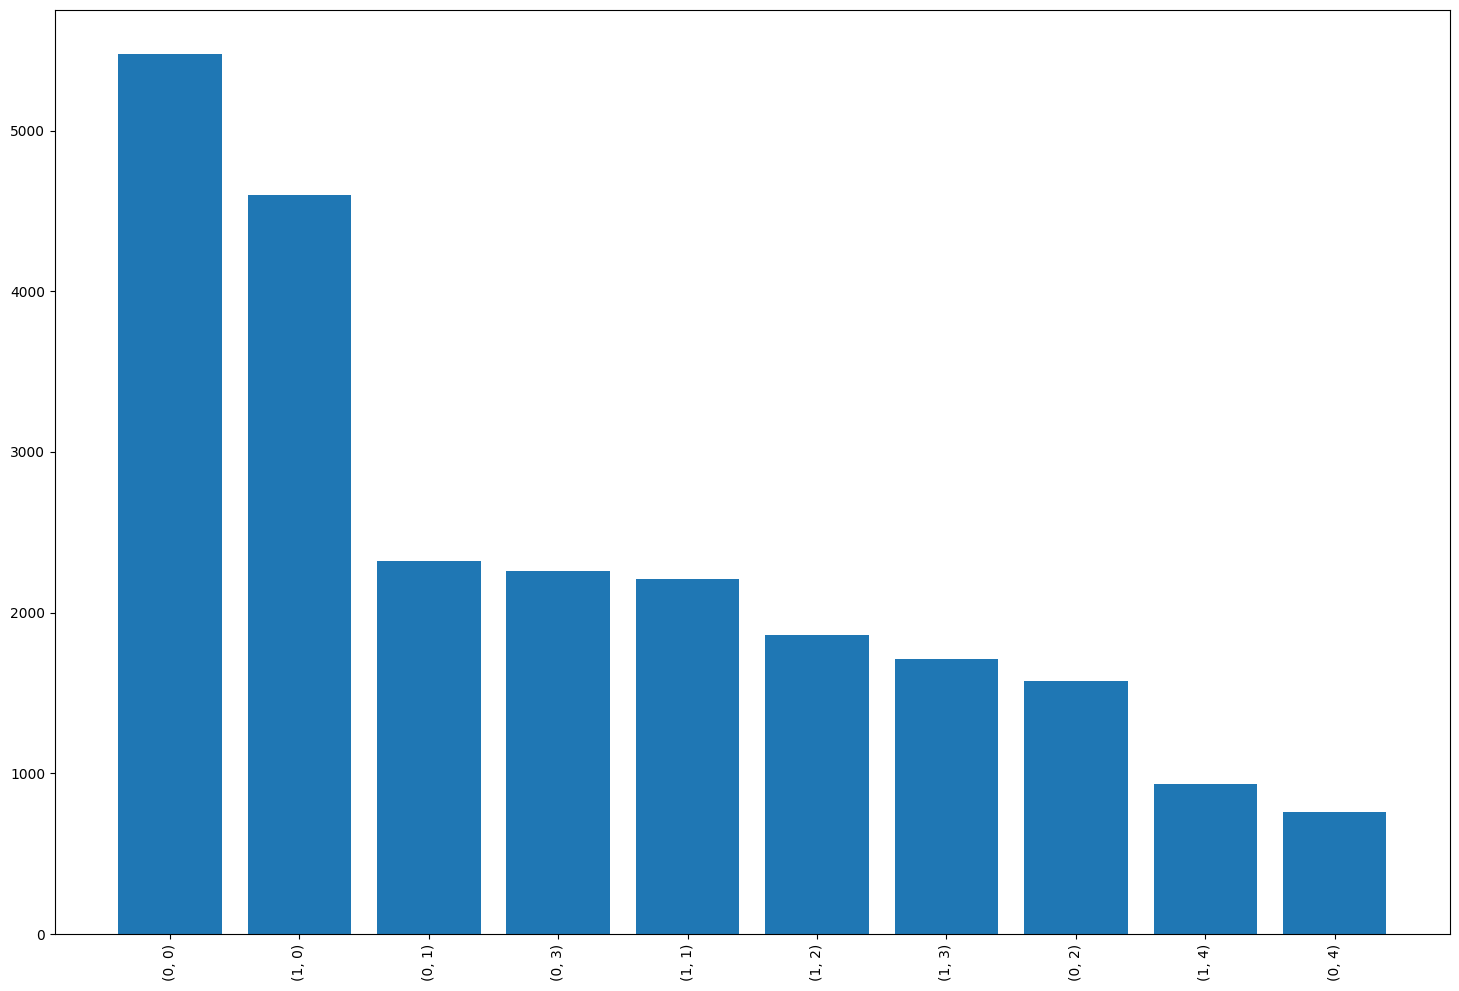

In [ ]:
df = data[['gender', 'race']]
keys = df.value_counts().index.to_list()
keys = [str(i) for i in keys]
values = df.value_counts().values
plt.figure(figsize=(18,12))
plt.bar(keys, values)
plt.xticks(keys, rotation='vertical')

([<matplotlib.axis.XTick at 0x7fd38ae04be0>,
 [Text(0.0, 0, "(1, '26-30')"),
  Text(1.0, 0, "(0, '31-40')"),
  Text(2.0, 0, "(0, '26-30')"),
  Text(3.0, 0, "(1, '31-40')"),
  Text(4.0, 0, "(1, '21-25')"),
  Text(5.0, 0, "(0, '51-60')"),
  Text(6.0, 0, "(0, '41-50')"),
  Text(7.0, 0, "(1, '0-5')"),
  Text(8.0, 0, "(0, '0-5')"),
  Text(9.0, 0, "(0, '21-25')"),
  Text(10.0, 0, "(0, '61-70')"),
  Text(11.0, 0, "(1, '51-60')"),
  Text(12.0, 0, "(1, '41-50')"),
  Text(13.0, 0, "(1, '16-20')"),
  Text(14.0, 0, "(1, '6-10')"),
  Text(15.0, 0, "(0, '16-20')"),
  Text(16.0, 0, "(0, '71-80')"),
  Text(17.0, 0, "(1, '61-70')"),
  Text(18.0, 0, "(0, '6-10')"),
  Text(19.0, 0, "(1, '11-15')"),
  Text(20.0, 0, "(1, '81-90')"),
  Text(21.0, 0, "(0, '11-15')"),
  Text(22.0, 0, "(1, '71-80')"),
  Text(23.0, 0, "(0, '81-90')"),
  Text(24.0, 0, "(1, '91-100')"),
  Text(25.0, 0, "(1, '100+')"),
  Text(26.0, 0, "(0, '91-100')"),
  Text(27.0, 0, "(0, '100+')")])

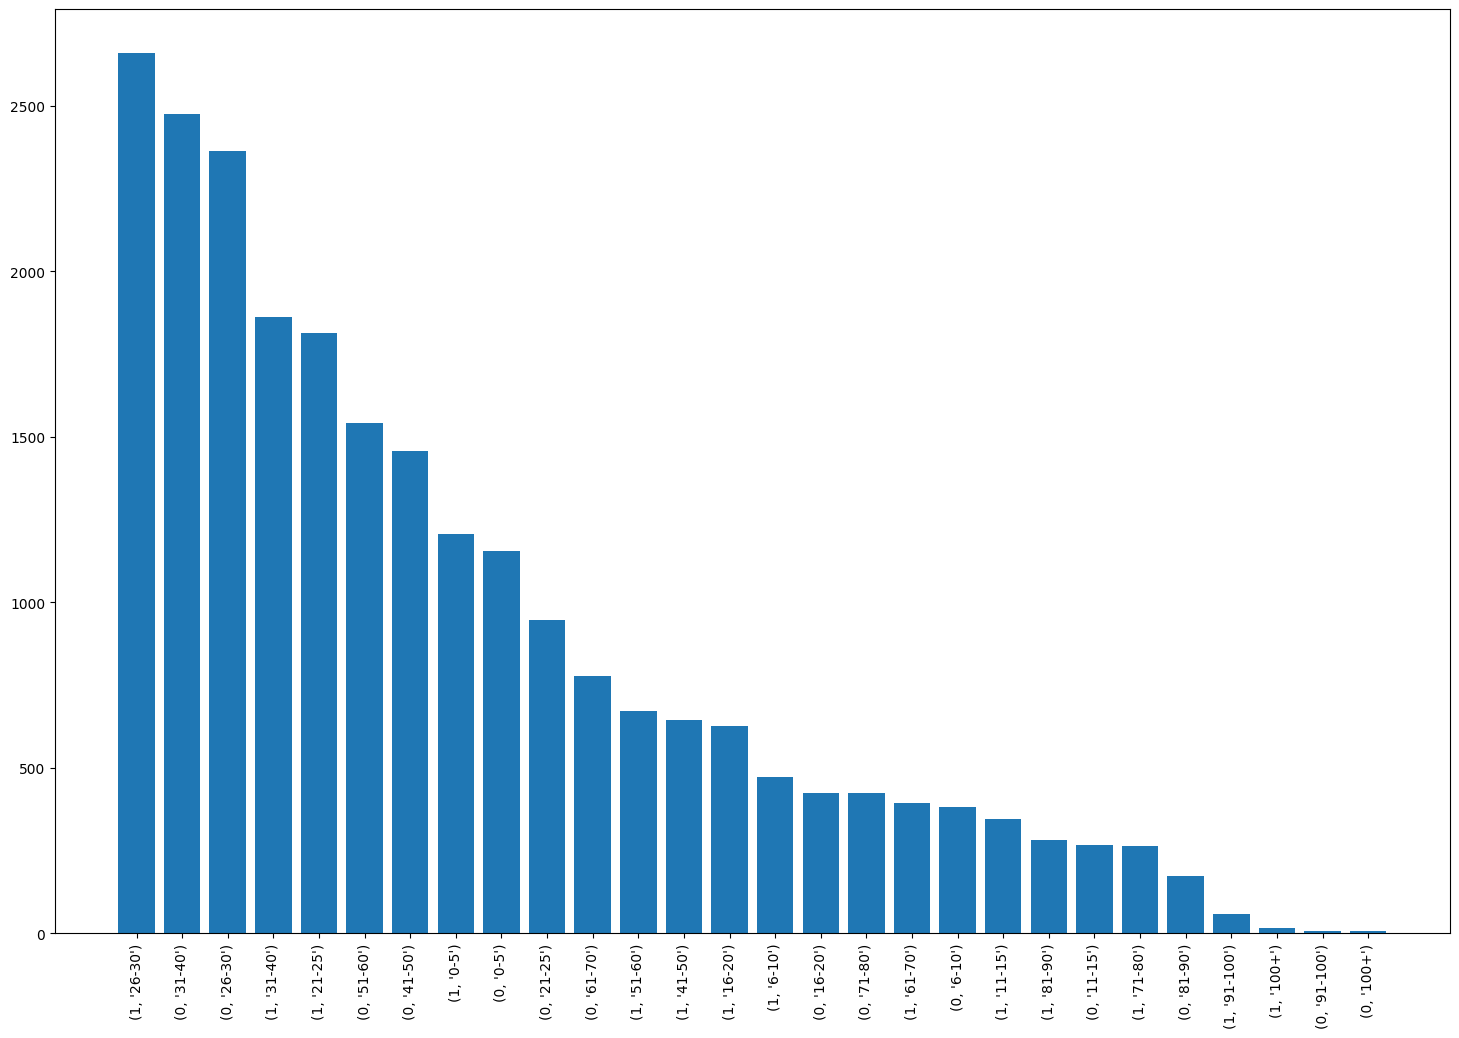

In [ ]:
df = data[['gender', 'age_group']]
keys = df.value_counts().index.to_list()
keys = [str(i) for i in keys]
values = df.value_counts().values
plt.figure(figsize=(18,12))
plt.bar(keys, values)
plt.xticks(keys, rotation='vertical')

([<matplotlib.axis.XTick at 0x7fd3933fd2d0>,
 [Text(0.0, 0, "(0, '31-40')"),
  Text(1.0, 0, "(0, '26-30')"),
  Text(2.0, 0, "(1, '26-30')"),
  Text(3.0, 0, "(0, '51-60')"),
  Text(4.0, 0, "(1, '31-40')"),
  Text(5.0, 0, "(0, '41-50')"),
  Text(6.0, 0, "(3, '26-30')"),
  Text(7.0, 0, "(2, '26-30')"),
  Text(8.0, 0, "(2, '0-5')"),
  Text(9.0, 0, "(0, '61-70')"),
  Text(10.0, 0, "(0, '21-25')"),
  Text(11.0, 0, "(3, '31-40')"),
  Text(12.0, 0, "(0, '0-5')"),
  Text(13.0, 0, "(3, '21-25')"),
  Text(14.0, 0, "(2, '21-25')"),
  Text(15.0, 0, "(0, '16-20')"),
  Text(16.0, 0, "(1, '21-25')"),
  Text(17.0, 0, "(0, '6-10')"),
  Text(18.0, 0, "(0, '71-80')"),
  Text(19.0, 0, "(3, '41-50')"),
  Text(20.0, 0, "(2, '31-40')"),
  Text(21.0, 0, "(3, '0-5')"),
  Text(22.0, 0, "(3, '51-60')"),
  Text(23.0, 0, "(0, '11-15')"),
  Text(24.0, 0, "(1, '41-50')"),
  Text(25.0, 0, "(4, '26-30')"),
  Text(26.0, 0, "(0, '81-90')"),
  Text(27.0, 0, "(4, '0-5')"),
  Text(28.0, 0, "(4, '21-25')"),
  Text(29.0, 0, "

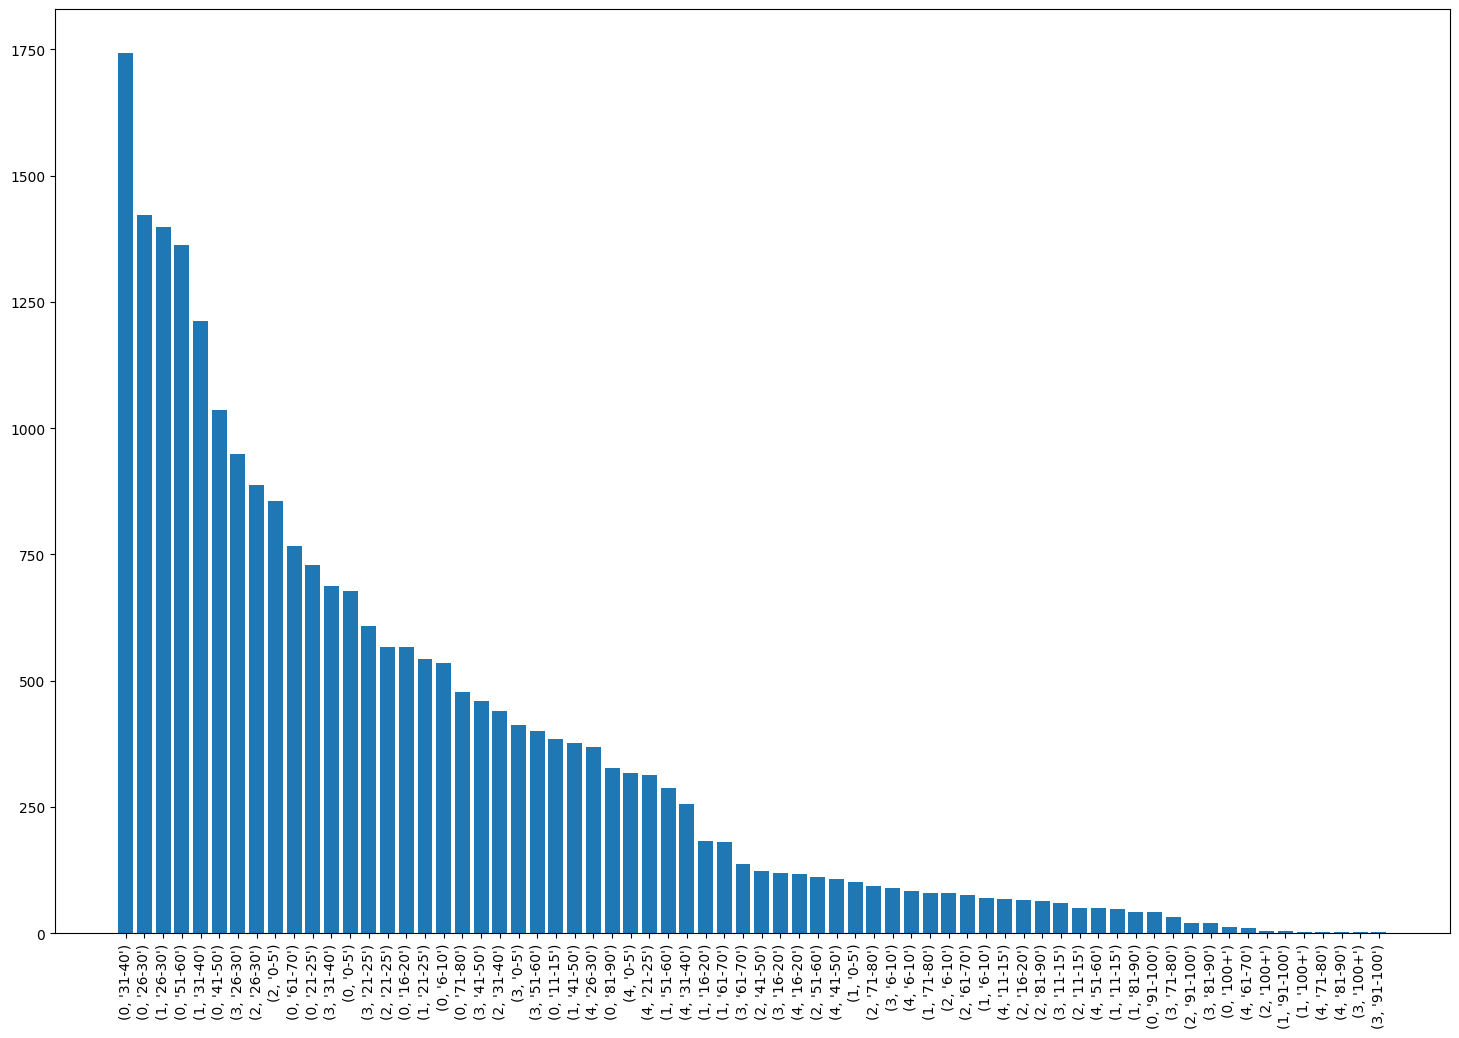

In [ ]:
df = data[['race', 'age_group']]
keys = df.value_counts().index.to_list()
keys = [str(i) for i in keys]
values = df.value_counts().values
plt.figure(figsize=(18,12))
plt.bar(keys, values)
plt.xticks(keys, rotation='vertical')

([<matplotlib.axis.XTick at 0x7fd38b66e800>,
 [Text(0.0, 0, "(0, 0, '31-40')"),
  Text(1.0, 0, "(0, 0, '51-60')"),
  Text(2.0, 0, "(0, 0, '26-30')"),
  Text(3.0, 0, "(1, 0, '31-40')"),
  Text(4.0, 0, "(1, 1, '26-30')"),
  Text(5.0, 0, "(0, 1, '26-30')"),
  Text(6.0, 0, "(1, 0, '26-30')"),
  Text(7.0, 0, "(0, 0, '41-50')"),
  Text(8.0, 0, "(1, 1, '31-40')"),
  Text(9.0, 0, "(1, 2, '26-30')"),
  Text(10.0, 0, "(0, 1, '31-40')"),
  Text(11.0, 0, "(1, 3, '26-30')"),
  Text(12.0, 0, "(0, 2, '0-5')"),
  Text(13.0, 0, "(0, 3, '31-40')"),
  Text(14.0, 0, "(0, 3, '26-30')"),
  Text(15.0, 0, "(1, 0, '51-60')"),
  Text(16.0, 0, "(0, 0, '61-70')"),
  Text(17.0, 0, "(1, 0, '21-25')"),
  Text(18.0, 0, "(1, 2, '21-25')"),
  Text(19.0, 0, "(1, 3, '21-25')"),
  Text(20.0, 0, "(1, 2, '0-5')"),
  Text(21.0, 0, "(0, 3, '41-50')"),
  Text(22.0, 0, "(1, 0, '0-5')"),
  Text(23.0, 0, "(1, 0, '41-50')"),
  Text(24.0, 0, "(0, 3, '51-60')"),
  Text(25.0, 0, "(1, 1, '21-25')"),
  Text(26.0, 0, "(1, 0, '16-20')"),

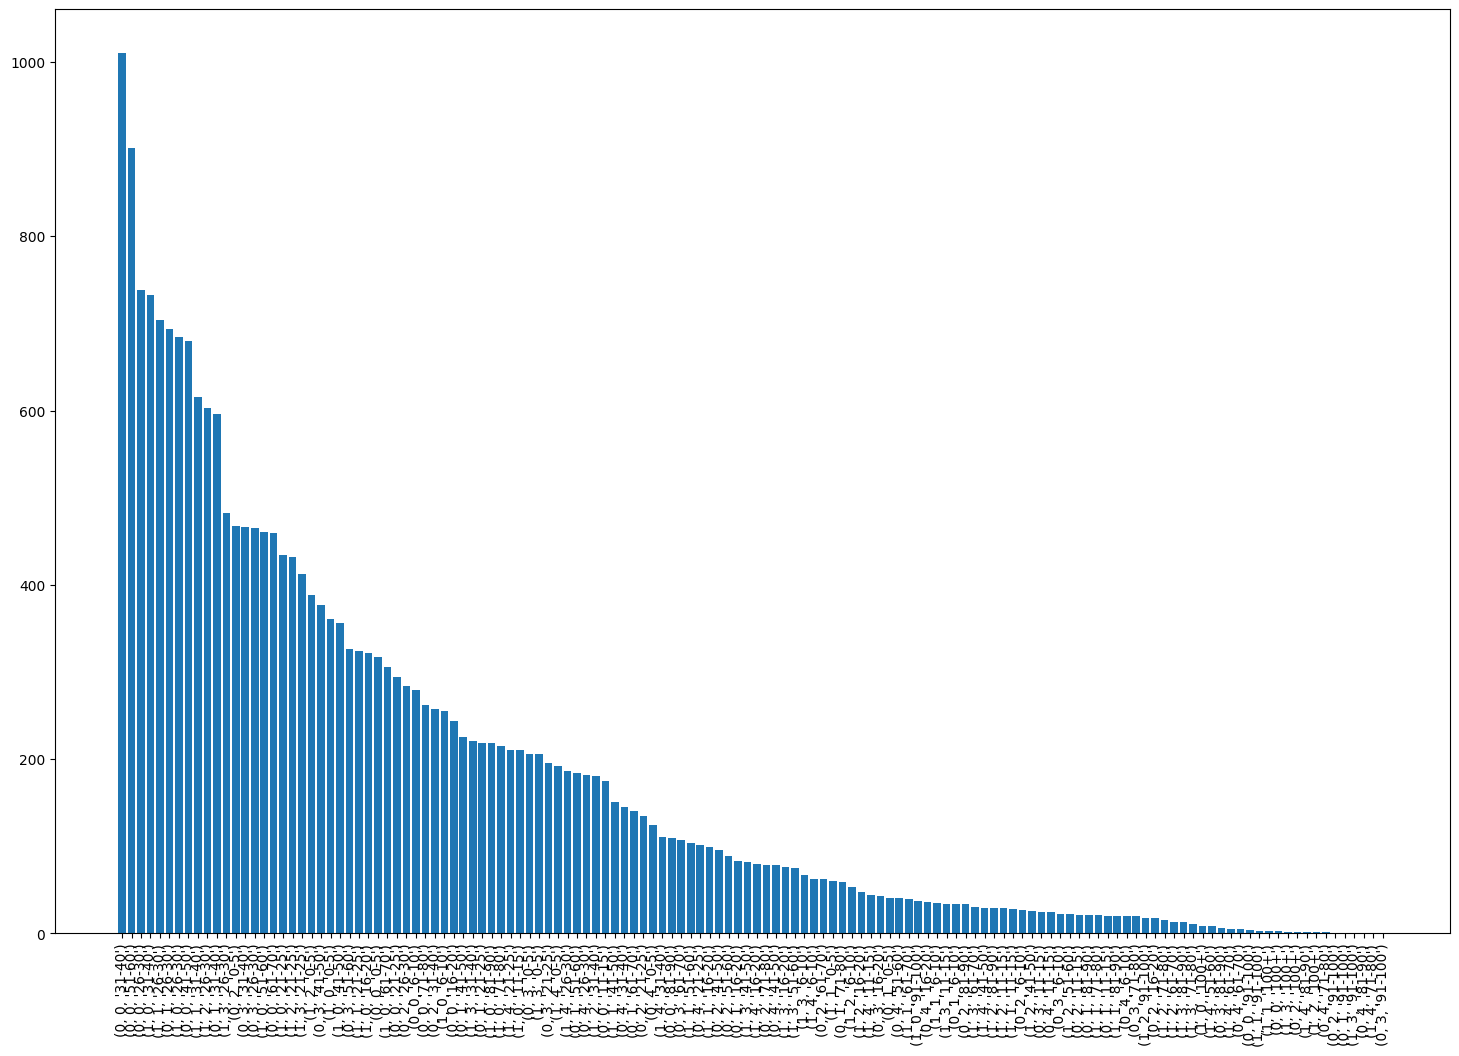

In [ ]:
df = data[['gender', 'race', 'age_group']]
keys = df.value_counts().index.to_list()
keys = [str(i) for i in keys]
values = df.value_counts().values
plt.figure(figsize=(18,12))
plt.bar(keys, values)
plt.xticks(keys, rotation='vertical')

### Data pre-processing

### Model building

Should predict age along with whether its fake or not

In [ ]:
# example of defining the discriminator model
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.utils.vis_utils import plot_model

# define the standalone discriminator model
def define_discriminator(in_shape=(200, 200, 3)):
	model = Sequential()
	# normal
	model.add(Conv2D(64, (3,3), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))
	# downsample
	model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# downsample
	model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# downsample
	model.add(Conv2D(256, (3,3), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# classifier
	model.add(Flatten())
	model.add(Dropout(0.4))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = Adam(learning_rate = 0.0002, beta_1 = 0.5)
	model.compile(loss='binary_crossentropy', optimizer = opt, metrics = ['accuracy'])
	return model

# define model
model = define_discriminator()
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

2023-04-28 12:08:18.282545: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-28 12:08:18.888657: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-28 12:08:18.888712: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-28 12:08:23.608197: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 64)      1792      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 200, 200, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 128)     73856     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 100, 100, 128)     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 128)       147584    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 50, 50, 128)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 25, 25, 256)       2

2023-04-28 12:08:29.131833: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-04-28 12:08:29.132041: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-28 12:08:29.132101: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-G8MIFS8): /proc/driver/nvidia/version does not exist
2023-04-28 12:08:29.133831: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
from numpy.random import randint
from numpy import ones
# select real samples
def generate_real_samples(dataset, n_samples):
	# choose random instances
	ix = randint(0, dataset.shape[0], n_samples)
	# retrieve selected images
	X = dataset[ix]
	# generate 'real' class labels (1)
	y = ones((n_samples, 1))
	return X, y

In [ ]:
from numpy.random import rand
from numpy import zeros
# generate n fake samples with class labels
def generate_fake_samples(n_samples):
	# generate uniform random numbers in [0,1]
	X = rand(200 * 200 * 3 * n_samples)
	# update to have the range [-1, 1]
	X = -1 + X * 2
	# reshape into a batch of grayscale images
	X = X.reshape((n_samples, 200, 200, 3))
	# generate 'fake' class labels (0)
	y = zeros((n_samples, 1))
	return X, y

In [ ]:
!pip3 install Pillow
from PIL import Image

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import numpy as np
X = []
for fl in data['img']:
  img = Image.open(folder_path + "/" + fl)
  X.append(np.asarray(img))
X = np.array(X)
X = (X - 127.5) / 127.5
data = X.astype('float32')

In [ ]:
print (X.shape)

In [ ]:
X[0]

In [ ]:
# train the discriminator model
def train_discriminator(model, dataset, n_iter=100, n_batch=256):
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_iter):
		# get randomly selected 'real' samples
		X_real, y_real = generate_real_samples(dataset, half_batch)
		# update discriminator on real samples
		_, real_acc = model.train_on_batch(X_real, y_real)
		# generate 'fake' examples
		X_fake, y_fake = generate_fake_samples(half_batch)
		# update discriminator on fake samples
		_, fake_acc = model.train_on_batch(X_fake, y_fake)
		# summarize performance
		print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))

In [ ]:
# define the discriminator model
model = define_discriminator()
# load image data
# fit the model
#train_discriminator(model, X)

Using sigmoid generates a black and white image...need to change that

In [ ]:
!pip install pydot graphviz

In [ ]:
# example of defining the generator model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.utils.vis_utils import plot_model

# define the standalone generator model
def define_generator(latent_dim):
  model = Sequential()
  # foundation for 7x7 image
  n_nodes = 256 * 25 * 25
  model.add(Dense(n_nodes, input_dim=latent_dim))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Reshape((25, 25, 256)))
  # upsample to 100x100
  model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  # upsample to 200x200
  model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2D(3, (7,7), activation='tanh', padding='same'))
  return model

# define the size of the latent space
latent_dim = 100
# define the generator model
model = define_generator(latent_dim)
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)

Should switch from noise to actual image

In [ ]:
from numpy.random import randn
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

In [ ]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples_new(g_model, latent_dim, n_samples):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n_samples)
	# update to have the range [-1, 1]
	x_input = -1 + x_input * 2
	# predict outputs
	X = g_model.predict(x_input)
	# create 'fake' class labels (0)
	y = zeros((n_samples, 1))
	return X, y

In [ ]:
from matplotlib import pyplot
# generate samples
n_samples = 25
X, _ = generate_fake_samples_new(model, latent_dim, n_samples)
# plot the generated samples
for i in range(n_samples):
  # define subplot
  pyplot.subplot(5, 5, 1 + i)
  # turn off axis labels
  pyplot.axis('off')
  # plot single image
  pyplot.imshow(X[i, :, :, 0], vmin = -1, vmax = 1)
# show the figure
pyplot.show()

In [ ]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
 # make weights in the discriminator not trainable
 d_model.trainable = False
 # connect them
 model = Sequential()
 # add generator
 model.add(g_model)
 # add the discriminator
 model.add(d_model)
 # compile model
 opt = Adam(learning_rate=0.0002, beta_1=0.5)
 model.compile(loss='binary_crossentropy', optimizer=opt)
 return model
 
# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# summarize gan model
gan_model.summary()
# plot gan model
plot_model(gan_model, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# train the composite model
def train_gan(gan_model, latent_dim, n_epochs=100, n_batch=256):
	# manually enumerate epochs
	for i in range(n_epochs):
		# prepare points in latent space as input for the generator
		x_gan = generate_latent_points(latent_dim, n_batch)
		# create inverted labels for the fake samples
		y_gan = ones((n_batch, 1))
		# update the generator via the discriminator's error
		gan_model.train_on_batch(x_gan, y_gan)

In [ ]:
from numpy import vstack
# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=1000, n_batch=256):
  bat_per_epo = int(dataset.shape[0] / n_batch)
  half_batch = int(n_batch / 2)
  # manually enumerate epochs
  for i in range(n_epochs):
    # enumerate batches over the training set
    for j in range(bat_per_epo):
      # get randomly selected 'real' samples
      X_real, y_real = generate_real_samples(dataset, half_batch)
      # generate 'fake' examples
      X_fake, y_fake = generate_fake_samples_new(g_model, latent_dim, half_batch)
      # create training set for the discriminator
      X, y = vstack((X_real, X_fake)), vstack((y_real, y_fake))
      # update discriminator model weights
      d_loss, _ = d_model.train_on_batch(X, y)
      # prepare points in latent space as input for the generator
      X_gan = generate_latent_points(latent_dim, n_batch)
      # create inverted labels for the fake samples
      y_gan = ones((n_batch, 1))
      # update the generator via the discriminator's error
      g_loss = gan_model.train_on_batch(X_gan, y_gan)
      # summarize loss on this batch
      print('>%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))
    # evaluate the model performance, sometimes
    if (i+1) % 10 == 0:
      summarize_performance(i, g_model, d_model, dataset, latent_dim)

In [ ]:
# evaluate the discriminator, plot generated images, save generator model
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=100):
	# prepare real samples
	X_real, y_real = generate_real_samples(dataset, n_samples)
	# evaluate discriminator on real examples
	_, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples_new(g_model, latent_dim, n_samples)
	# evaluate discriminator on fake examples
	_, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
	# save plot
	save_plot(x_fake, epoch)
	# save the generator model tile file
	filename = 'generator_model_%03d.h5' % (epoch + 1)
	g_model.save(filename)

In [ ]:
# create and save a plot of generated images (reversed grayscale)
def save_plot(examples, epoch, n=10):
	# plot images
	for i in range(n * n):
		# define subplot
		pyplot.subplot(n, n, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(examples[i, :, :, 0], vmin = -1, vmax = 1)
	# save plot to file
	filename = 'generated_plot_e%03d.png' % (epoch+1)
	pyplot.savefig(filename)
	pyplot.close()

In [ ]:
# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# load image data
dataset = data
# train model
train(g_model, d_model, gan_model, dataset, latent_dim)

In [ ]:
# example of loading the generator model and generating images
from keras.models import load_model
from numpy.random import randn
from matplotlib import pyplot

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

# create and save a plot of generated images (reversed grayscale)
def save_plot(examples, n):
	# plot images
	for i in range(n * n):
		# define subplot
		pyplot.subplot(n, n, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(examples[i, :, :, 0])
	pyplot.show()

# load model
model = load_model('generator_model_1000.h5')
# generate images
latent_points = generate_latent_points(100, 25)
# generate images
X = model.predict(latent_points)
# plot the result
save_plot(X, 5)

### New Model

In [ ]:
# example of a dcgan on cifar10
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy.random import randn
from numpy.random import randint
from keras.datasets.cifar10 import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from matplotlib import pyplot

In [ ]:
 # define the standalone discriminator model
def define_discriminator(in_shape=(200,200,3)):
  model = Sequential()
  # normal
  model.add(Conv2D(64, (3,3), padding='same', input_shape=in_shape))
  model.add(LeakyReLU(alpha=0.2))
  # downsample
  model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  # downsample
  model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  # downsample
  model.add(Conv2D(256, (3,3), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  # classifier
  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1, activation='sigmoid'))
  # compile model
  opt = Adam(lr=0.0002, beta_1=0.5)
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
  return model

In [ ]:
# define the standalone generator model
def define_generator(latent_dim):
  model = Sequential()
  # foundation for 25x25 image
  n_nodes = 256 * 25 * 25
  model.add(Dense(n_nodes, input_dim=latent_dim))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Reshape((25, 25, 256)))
  # upsample to 50x50
  model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  # upsample to 100x100
  model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  # upsample to 200x200
  model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  # output layer
  model.add(Conv2D(3, (3,3), activation='tanh', padding='same'))
  return model

In [ ]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
 # make weights in the discriminator not trainable
 d_model.trainable = False
 # connect them
 model = Sequential()
 # add generator
 model.add(g_model)
 # add the discriminator
 model.add(d_model)
 # compile model
 opt = Adam(lr=0.0002, beta_1=0.5)
 model.compile(loss='binary_crossentropy', optimizer=opt)
 return model

In [ ]:
# load and prepare cifar10 training images
def load_real_samples():
  import numpy as np
  from PIL import Image
  X = []
  for fl in data['img']:
    img = Image.open(folder_path + "/" + fl)
    X.append(np.asarray(img))
  X = np.array(X)
  X = (X - 127.5) / 127.5
  return X.astype('float32')

In [ ]:
# select real samples
def generate_real_samples(dataset, n_samples):
 # choose random instances
 ix = randint(0, dataset.shape[0], n_samples)
 # retrieve selected images
 X = dataset[ix]
 # generate 'real' class labels (1)
 y = ones((n_samples, 1))
 return X, y

In [ ]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
 # generate points in the latent space
 x_input = randn(latent_dim * n_samples)
 # reshape into a batch of inputs for the network
 x_input = x_input.reshape(n_samples, latent_dim)
 return x_input

In [ ]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
 # generate points in latent space
 x_input = generate_latent_points(latent_dim, n_samples)
 # predict outputs
 X = g_model.predict(x_input)
 # create 'fake' class labels (0)
 y = zeros((n_samples, 1))
 return X, y

In [ ]:
# create and save a plot of generated images
def save_plot(examples, epoch, n=7):
  # scale from [-1,1] to [0,1]
  examples = (examples + 1) / 2.0
  # plot images
  for i in range(n * n):
    # define subplot
    pyplot.subplot(n, n, 1 + i)
    # turn off axis
    pyplot.axis('off')
    # plot raw pixel data
    pyplot.imshow(examples[i])
    # save plot to file
  filename = 'generated_plot_e%03d.png' % (epoch+1)
  pyplot.savefig(filename)
  pyplot.close()

In [ ]:
# evaluate the discriminator, plot generated images, save generator model
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=150):
 # prepare real samples
 X_real, y_real = generate_real_samples(dataset, n_samples)
 # evaluate discriminator on real examples
 _, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
 # prepare fake examples
 x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
 # evaluate discriminator on fake examples
 _, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
 # summarize discriminator performance
 print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
 # save plot
 save_plot(x_fake, epoch)
 # save the generator model tile file
 filename = 'generator_model_%03d.h5' % (epoch+1)
 g_model.save(filename)

In [ ]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=50, n_batch=128):
  bat_per_epo = int(dataset.shape[0] / n_batch)
  half_batch = int(n_batch / 2)
  # manually enumerate epochs
  for i in range(n_epochs):
    # enumerate batches over the training set
    for j in range(bat_per_epo):
      # get randomly selected 'real' samples
      X_real, y_real = generate_real_samples(dataset, half_batch)
      # update discriminator model weights
      d_loss1, _ = d_model.train_on_batch(X_real, y_real)
      # generate 'fake' examples
      X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
      # update discriminator model weights
      d_loss2, _ = d_model.train_on_batch(X_fake, y_fake)
      # prepare points in latent space as input for the generator
      X_gan = generate_latent_points(latent_dim, n_batch)
      # create inverted labels for the fake samples
      y_gan = ones((n_batch, 1))
      # update the generator via the discriminator's error
      g_loss = gan_model.train_on_batch(X_gan, y_gan)
      # summarize loss on this batch
      print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' %
      (i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))
    # evaluate the model performance, sometimes
    if (i+1) % 10 == 0:
      summarize_performance(i, g_model, d_model, dataset, latent_dim)

In [ ]:
# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# load image data
dataset = load_real_samples()
# train model
train(g_model, d_model, gan_model, dataset, latent_dim)

Metal device set to: Apple M1 Pro


2023-04-28 22:52:20.467348: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-28 22:52:20.467908: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/sauravsjk/miniconda/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2023-04-28 22:55:08.484233: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-04-28 22:55:08.485406: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 0s

2023-04-28 22:55:09.148097: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 518ms/step


2023-04-28 22:55:11.226077: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


>1, 1/185, d1=0.686, d2=0.697 g=0.693
2/2 [==============================] - 0s 351ms/step
>1, 2/185, d1=0.306, d2=0.697 g=0.696
2/2 [==============================] - 0s 352ms/step
>1, 3/185, d1=0.070, d2=0.695 g=0.703
2/2 [==============================] - 0s 352ms/step
>1, 4/185, d1=0.015, d2=0.689 g=0.713
2/2 [==============================] - 0s 347ms/step
>1, 5/185, d1=0.004, d2=0.685 g=0.727
2/2 [==============================] - 0s 353ms/step
>1, 6/185, d1=0.002, d2=0.680 g=0.749
2/2 [==============================] - 0s 350ms/step
>1, 7/185, d1=0.004, d2=0.657 g=0.808
2/2 [==============================] - 0s 353ms/step
>1, 8/185, d1=0.007, d2=0.573 g=0.982
2/2 [==============================] - 0s 353ms/step
>1, 9/185, d1=0.017, d2=0.454 g=1.240
2/2 [==============================] - 0s 351ms/step
>1, 10/185, d1=0.010, d2=0.344 g=1.556
2/2 [==============================] - 0s 350ms/step
>1, 11/185, d1=0.004, d2=0.234 g=1.985
2/2 [==============================] - 0s 352ms/st

2023-04-29 01:47:09.544759: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/5 [=====>........................] - ETA: 0s

2023-04-29 01:47:10.403538: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 354ms/step
>37, 94/185, d1=0.560, d2=0.649 g=0.820
2/2 [==============================] - 0s 352ms/step
>37, 95/185, d1=0.616, d2=0.695 g=0.834
2/2 [==============================] - 0s 350ms/step
>37, 96/185, d1=0.565, d2=0.610 g=0.876
2/2 [==============================] - 0s 353ms/step
>37, 97/185, d1=0.595, d2=0.612 g=0.850
2/2 [==============================] - 0s 344ms/step
>37, 98/185, d1=0.613, d2=0.626 g=0.862
2/2 [==============================] - 0s 350ms/step
>37, 99/185, d1=0.690, d2=0.664 g=0.865
2/2 [==============================] - 0s 352ms/step
>37, 100/185, d1=0.668, d2=0.626 g=0.900
2/2 [==============================] - 0s 352ms/step
>37, 101/185, d1=0.649, d2=0.666 g=0.886
2/2 [==============================] - 0s 353ms/step
>37, 102/185, d1=0.723, d2=0.632 g=0.917
2/2 [==============================] - 0s 352ms/step
>37, 103/185, d1=0.684, d2=0.601 g=0.977
2/2 [==========